In [1]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("/kaggle/input/california-homelessness-prediction-challenge/train.csv")

train_data.head()

,ID,HOMELESS_RATE,AGE_U18_PCT,AGE_18_24_PCT,AGE_25_34_PCT,AGE_35_44_PCT,AGE_45_54_PCT,AGE_55_59_PCT,AGE_60_61_PCT,AGE_62_64_PCT,...,NONVETERAN_POP_PCT,DISABILITY_POP_PCT,NODISABILITY_POP_PCT,TOTAL_HOUSEHOLDS_PCT,FAMILY_HH_TOTAL,FAMILY_HH_CHILD_LT18_PCT,NONFAMILY_SINGLE_MALE_PCT,NONFAMILY_SINGLE_FEMALE_PCT,MULTI_PERSON_NONFAMILY_HH_PCT,INDIVIDUALS_NOT_IN_FAMILY_UNITS_PCT
0,SC_05,0.000000,0.388210,0.054130,0.058164,0.061302,0.161269,0.062087,0.037431,0.051104,...,0.771265,0.460607,0.020397,0.305727,0.251373,0.076544,0.174829,0.054354,0.021966,0.054354
1,RV_08,0.000999,0.368737,0.089002,0.132744,0.137555,0.156465,0.082081,0.031715,0.035453,...,0.766820,0.457923,0.023203,0.227111,0.184183,0.064947,0.119236,0.042928,0.016283,0.042928
2,SC_10,0.004736,0.429991,0.071720,0.204073,0.176398,0.127522,0.046399,0.020886,0.025102,...,0.767663,0.517711,0.030974,0.237949,0.198297,0.094440,0.103857,0.039651,0.014248,0.039651
3,AL_12,0.001269,0.476342,0.058899,0.115471,0.156583,0.147944,0.064417,0.027537,0.032103,...,0.731965,0.498431,0.023747,0.272830,0.234998,0.118750,0.116247,0.037832,0.013240,0.037832
4,SAC_04,0.000394,0.513634,0.078841,0.112881,0.145494,0.148405,0.066102,0.024644,0.029827,...,0.700749,0.485158,0.029264,0.249969,0.189581,0.093464,0.096118,0.060387,0.016156,0.060387


# Viability of KNN on the dataset
Let's run an initial test with some default hyperparameters to determine the viability of using the KNN model on this dataset.  
The leaderboard tops out at `0.00000` (5 zeroes) and is the Mean Squared Error.  
We're looking to get close to that.

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = train_data.iloc[:, 2:]
y = train_data["HOMELESS_RATE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

predicted = model.predict(X_test)
MSE = mean_squared_error(y_test, predicted)
print(f'MSE: {MSE:f}')
print(f'Score: {MSE:.5f}')

MSE: 0.000014
Score: 0.00001


Off the bat, the KNN Regressor does very well on this dataset. Now let's try to search the hyperparameter space for a better score.

# Exploring Hyperparameters
Let's evaluate the MSE at values of k neighbors using the average of random train/test splits, and plot them to get an idea of where the best neighbor value would be.

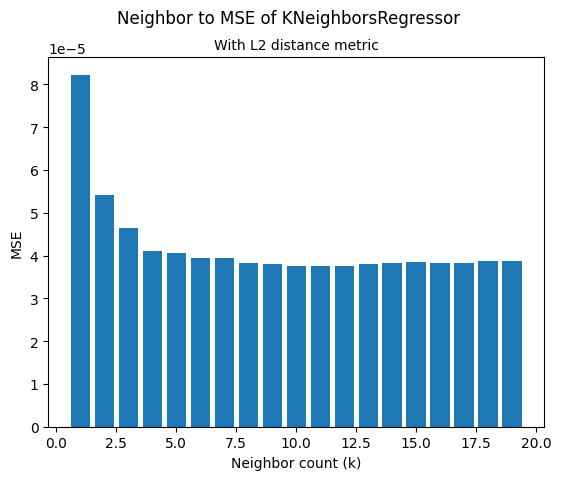

k=0: 0.000082
k=1: 0.000054
k=2: 0.000047
k=3: 0.000041
k=4: 0.000041
k=5: 0.000039
k=6: 0.000039
k=7: 0.000038
k=8: 0.000038
k=9: 0.000038
k=10: 0.000038
k=11: 0.000038
k=12: 0.000038
k=13: 0.000038
k=14: 0.000038
k=15: 0.000038
k=16: 0.000038
k=17: 0.000039
k=18: 0.000039


In [3]:
import matplotlib.pyplot as plt


def get_mse_for_k(k, e=5, metric='minkowski'):
    MSE_total = 0
    for i in range(e):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
        model = KNeighborsRegressor(n_neighbors=k, metric=metric)
        model.fit(X_train, y_train)
        predicted = model.predict(X_test)
        MSE = mean_squared_error(y_test, predicted)
        MSE_total += MSE
    MSE_avg = MSE_total / e
    return MSE_avg

labels = list(range(1,20))
values = [get_mse_for_k(x) for x in range(1,20)]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('MSE')
ax.set_xlabel('Neighbor count (k)')
plt.suptitle('Neighbor to MSE of KNeighborsRegressor')
ax.set_title('With L2 distance metric', size=10)
plt.show()

print("\n".join([f'k={i}: {x:f}' for i,x in enumerate(values)]))

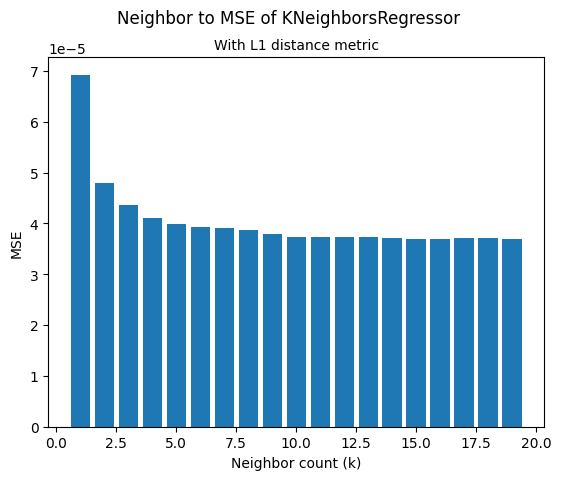

k=0: 0.000069
k=1: 0.000048
k=2: 0.000044
k=3: 0.000041
k=4: 0.000040
k=5: 0.000039
k=6: 0.000039
k=7: 0.000039
k=8: 0.000038
k=9: 0.000037
k=10: 0.000037
k=11: 0.000037
k=12: 0.000037
k=13: 0.000037
k=14: 0.000037
k=15: 0.000037
k=16: 0.000037
k=17: 0.000037
k=18: 0.000037


In [4]:
labels = list(range(1,20))
values = [get_mse_for_k(x, metric='l1') for x in range(1,20)]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('MSE')
ax.set_xlabel('Neighbor count (k)')
plt.suptitle('Neighbor to MSE of KNeighborsRegressor')
ax.set_title('With L1 distance metric', size=10)
plt.show()

print("\n".join([f'k={i}: {x:f}' for i,x in enumerate(values)]))

Evaluating for both L1 and L2 distance metrics shows that, on average, L1 distance metric gets a better result around k=10, whereas L2 seems to bottom out at a slightly higher value at k=8.

# Prediction submission
Let's submit predictions made by a model given our chosen hyperparameters - L1 metric at k=10.

In [5]:

test_data = pd.read_csv("/kaggle/input/california-homelessness-prediction-challenge/test.csv")

# Remove ID column
test_data.head()
test_data_without_ids = test_data.iloc[:,1:]

In [6]:
model = KNeighborsRegressor(n_neighbors=10, metric="l1")
model.fit(X, y)

predictions = model.predict(test_data_without_ids)

#Submission: ID, HOMELESS_RATE
submission = pd.DataFrame({'ID': test_data["ID"], 'HOMELESS_RATE': predictions})
submission.to_csv('submission.csv', index=False)
print(submission)


        ID  HOMELESS_RATE
0    AL_13       0.003282
1    LA_10       0.011350
2    SD_15       0.001623
3    SB_11       0.002493
4    SB_09       0.001956
5    OC_28       0.002571
6    AL_02       0.001907
7    RV_29       0.001394
8    SB_01       0.001903
9    SC_14       0.001192
10   SB_41       0.001529
11   AL_14       0.003181
12   RV_02       0.003054
13   SD_19       0.003103
14   SB_36       0.003778
15   SB_12       0.003322
16   OC_29       0.001440
17   AL_06       0.001693
18   SB_23       0.003954
19   OC_35       0.000984
20   SC_12       0.002723
21   RV_15       0.003642
22   SF_07       0.003938
23   SB_10       0.003800
24   OC_18       0.003764
25   OC_22       0.001864
26   RV_19       0.001503
27   SB_08       0.003602
28   SB_24       0.002768
29   LA_02       0.007483
30   SB_29       0.003321
31   SD_07       0.002066
32   LA_15       0.003336
33   OC_26       0.001496
34   SD_09       0.003379
35   SD_20       0.002531
36   SB_06       0.003418
37   OC_06  